<a href="https://colab.research.google.com/github/seulkiki/TFMaster/blob/master/tf07_The_Functional_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Functional API:input, out을 직접 구현가능

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
inputs = keras.Input(shape =(784,))

In [3]:
# Just for demonstration purposes.
img_inputs = keras.Input(shape=(32, 32, 3))

In [4]:
inputs.shape

TensorShape([None, 784])

In [5]:
inputs.dtype



tf.float32

In [6]:
dense = layers.Dense(64, activation="relu")
x = dense(inputs)

In [7]:
x = layers.Dense(64, activation="relu")(x)
outputs = layers.Dense(10)(x)

In [8]:
model = keras.Model(inputs=inputs, outputs=outputs, name="mnist_model")

In [9]:
model.summary()


Model: "mnist_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


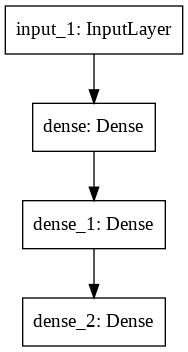

In [10]:
keras.utils.plot_model(model, "my_first_model.png")


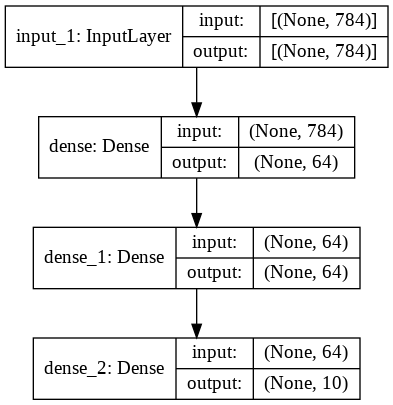

In [11]:
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)


Training, evaluation, and inference

In [12]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=keras.optimizers.RMSprop(),
    metrics=["accuracy"],
)

history = model.fit(x_train, y_train, batch_size=64, epochs=2, validation_split=0.2)

test_scores = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

11501568/11490434 [==============================] - 0s 0us/step
Epoch 1/2
750/750 [==============================] - 6s 4ms/step - loss: 0.3553 - accuracy: 0.8986 - val_loss: 0.1949 - val_accuracy: 0.9437
Epoch 2/2
750/750 [==============================] - 2s 3ms/step - loss: 0.1680 - accuracy: 0.9510 - val_loss: 0.1437 - val_accuracy: 0.9589
313/313 - 1s - loss: 0.1452 - accuracy: 0.9577
Test loss: 0.14515277743339539
Test accuracy: 0.9577000141143799


Save and serialize

In [14]:
model.save("path_to_my_model")
del model
# Recreate the exact same model purely from the file:
model = keras.models.load_model("path_to_my_model")

INFO:tensorflow:Assets written to: path_to_my_model/assets


In [15]:
model.optimizer

In [16]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(784, 64) dtype=float32, numpy=
 array([[-0.00645395, -0.0629871 ,  0.02625206, ..., -0.07987839,
         -0.02172747,  0.05005688],
        [-0.06879241,  0.03885052,  0.06838848, ...,  0.00589843,
          0.03624913,  0.05769608],
        [-0.01592999,  0.08289874,  0.04273053, ...,  0.04075046,
         -0.07467115,  0.03388373],
        ...,
        [-0.01202109,  0.01132405, -0.01713265, ...,  0.05043217,
         -0.06443904, -0.02958146],
        [ 0.00395751, -0.06174815,  0.0040117 , ..., -0.05114968,
         -0.06490763,  0.07625202],
        [ 0.00844581,  0.05851554, -0.03169222, ..., -0.05433252,
          0.05569579, -0.06646594]], dtype=float32)>,
 <tf.Variable 'dense/bias:0' shape=(64,) dtype=float32, numpy=
 array([-0.06215294,  0.11062591,  0.0590333 ,  0.01427541, -0.019578  ,
         0.01677958,  0.09665208,  0.03730322, -0.03941038,  0.01137369,
         0.01616202,  0.06845099,  0.03929361, -0.0263532 ,  0.07656977,
      

Use the same graph of layers to define multiple models

In [18]:
encoder_input = keras.Input(shape=(28, 28, 1), name="img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()


Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d (Global (None, 16)                0   

autoencoder: 차원축소해서 특징을 뽑기

가중치가 학습이 안되서 잘 대변하지 못함.
학습시키기 위해서 loss가 필요함(

  원본을 복구해서 복구된 이미지와 유사한지 loss를 두고 계산을 한다.

  최대한 유사한 방향으로 학습을 하면 그 차원 축소에서 추출한 것이 잘 가져온 것이다.

 # 오토인코더 구조

In [19]:
encoder_input = keras.Input(shape=(28, 28, 1), name="original_img")
x = layers.Conv2D(16, 3, activation="relu")(encoder_input)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation="relu")(x)
x = layers.Conv2D(16, 3, activation="relu")(x)
encoder_output = layers.GlobalMaxPooling2D()(x)

encoder = keras.Model(encoder_input, encoder_output, name="encoder")
encoder.summary()

x = layers.Reshape((4, 4, 1))(encoder_output)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu")(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation="relu")(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation="relu")(x)

# 합친 것을 autoencoder이라 칭함
autoencoder = keras.Model(encoder_input, decoder_output, name="autoencoder")
autoencoder.summary()


Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 16)                0   

decoder도 따로 input을 넣어줌: 2개의 모델을 가질 때 모델들을 결합할 수 있다.

In [23]:
def get_model():
  inputs = keras.Input(shape=(128,))
  outputs = layers.Dense(1)(inputs)
  return keras.Model(inputs, outputs)

  model1 = get_model
  model2 = get_model
  model3 = get_model

  inputs = keras.Input(shape=(128,))
  y1 = model(inputs)
  y2 = model(inputs)
  y3 = model(inputs)
  outputs = layers.average([y1,y2,y3])
  ensemble_model = keras.Model(inputs=inputs, outputs=outputs)


  #output에는 전부다 똑같이 input값의 평균이 들어간다.(병렬적으로 구성 된다)

In [25]:
ensemble_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 128)]        0                                            
__________________________________________________________________________________________________
model (Functional)              (None, 1)            129         input_6[0][0]                    
__________________________________________________________________________________________________
model_1 (Functional)            (None, 1)            129         input_6[0][0]                    
__________________________________________________________________________________________________
model_2 (Functional)            (None, 1)            129         input_6[0][0]                    
____________________________________________________________________________________________

Manipulate complex graph topologies

In [28]:
"""
입력
- 티켓의 제목
- 티켓의 본문 내용
- 사용자가 추가한 태그(범주)


출력
- 0~1 사이의 우선 순위 점수
- 티켓을 처리할 부서


"""

'\n입력\n- 티켓의 제목\n- 티켓의 본문 내용\n- 사용자가 추가한 태그(범주)\n\n\n출력\n- 0~1 사이의 우선 순위 점수\n- 티켓을 처리할 부서\n\n\n'

In [34]:
num_tags = 12
num_words = 10000 # (전처리된 단어의 개수 10000 라 가졍)
num_departments = 4  #부서의 개수:4개

title_input = keras.Input(
    shape=(None,), name="title"
)  
body_input = keras.Input(shape=(None,), name="body") 
tags_input = keras.Input(
    shape=(num_tags,), name="tags")

#단어 이기 때문에 embedding

title_features = layers.Embedding(num_words, 64)(title_input)
body_features = layers.Embedding(num_words, 64)(body_input)

title_features = layers.LSTM(128)(title_features)
body_features = layers.LSTM(32)(body_features)

#합쳐주기
x = layers.concatenate([title_features, body_features, tags_input])

priority_pred = layers.Dense(1, name="priority")(x)
department_pred = layers.Dense(num_departments, name="department")(x)

model = keras.Model(
    inputs=[title_input, body_input, tags_input],
    outputs=[priority_pred, department_pred],
)
#대괄호를 열어 input값을 모두 넣어주기
#부서가 4개 이므로 softmax 함수


Now plot the model:



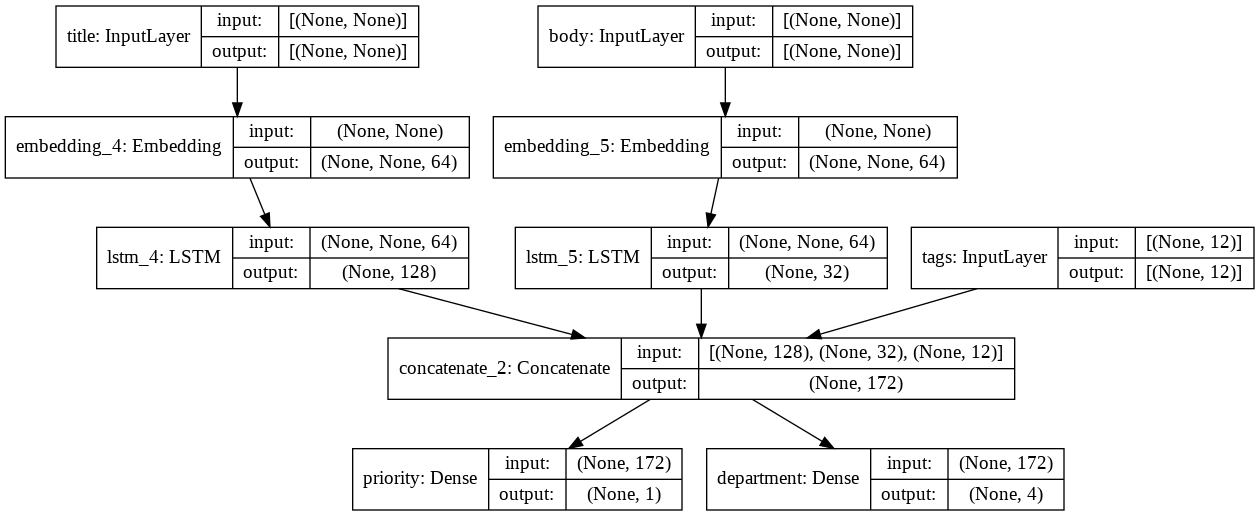

In [35]:
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [38]:
model.compile(
    optimizer= keras.optimizers.RMSprop(1e-3),
    loss=[
          keras.losses.BinaryCrossentropy(from_logits=True),
          keras.losses.CategoricalCrossentropy(from_logits=True), 
    ],
    loss_weights=[1.0, 0.2],
)

#두개의 로스가 있으니 가중치 설정하기

In [42]:
model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss={
        "priority": keras.losses.BinaryCrossentropy(from_logits=True),
        "department": keras.losses.CategoricalCrossentropy(from_logits=True),
    },
    loss_weights=[1.0, 0.2],
)

가상의 값을 넣어 학습시키기(랜덤)

In [45]:
title_data = np.random.randint(num_words,size=(1280,10))
body_data = np.random.randint(num_words,size=(1280,100))
tags_data = np.random.randint(2, size=(1280, num_tags)).astype("float32")


In [44]:
np.random.randint(num_words,size=(1280,10))

array([[6873, 4318, 6379, ..., 9009, 9299, 5970],
       [3226, 2618, 3700, ..., 1705,  468, 3125],
       [9631, 7601,  622, ..., 3600, 6818,  389],
       ...,
       [7562, 3492, 1043, ..., 5883, 4607, 6361],
       [6275, 6984, 4393, ...,  377, 4899, 4018],
       [2405, 6846, 5009, ..., 4149, 4933, 9670]])

In [47]:
np.random.randint(num_words,size=(1280,100))# 본문이니 내용이 더 많아 100으로 설정

array([[8771, 1655, 2076, ..., 2733, 7937, 5657],
       [7522, 5819,  832, ..., 5950, 6646, 3505],
       [9562,  791, 7811, ..., 6274, 5669, 2139],
       ...,
       [2142, 6263, 1340, ..., 6698, 4316, 4112],
       [4978,  882, 8757, ..., 2553, 5682,   80],
       [7133, 9720, 6295, ..., 2164, 3954,  435]])

In [49]:
np.random.randint(2, size=(1280, num_tags)).astype("float32")# 1280개에서 tag를 가지면 1, 없으면 0

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 1., 1.],
       [0., 1., 1., ..., 1., 1., 1.],
       [0., 0., 0., ..., 1., 1., 0.]], dtype=float32)

In [51]:
priority_targets = np.random.random(size=(1280, 1)) #우선순위는 하나의 값이니 1로 설정
dept_targets = np.random.randint(2, size=(1280, num_departments))

model.fit(
    {"title": title_data, "body": body_data, "tags": tags_data},
    {"priority": priority_targets, "department": dept_targets},
    epochs=2,
    batch_size=32,
)

Epoch 1/2
40/40 [==============================] - 1s 34ms/step - loss: 1.3118 - priority_loss: 0.6996 - department_loss: 3.0611
Epoch 2/2
40/40 [==============================] - 1s 31ms/step - loss: 1.2925 - priority_loss: 0.6976 - department_loss: 2.9742


In [52]:
inputs = keras.Input(shape=(32, 32, 3), name="img")
x = layers.Conv2D(32, 3, activation="relu")(inputs)
x = layers.Conv2D(64, 3, activation="relu")(x)
block_1_output = layers.MaxPooling2D(3)(x)

#Residual connection
x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_1_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_2_output = layers.add([x, block_1_output])

x = layers.Conv2D(64, 3, activation="relu", padding="same")(block_2_output)
x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
block_3_output = layers.add([x, block_2_output])

x = layers.Conv2D(64, 3, activation="relu")(block_3_output)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(10)(x)

model = keras.Model(inputs, outputs, name="toy_resnet")
model.summary()

#* padding = 'valid' - 패딩 적용 안함- input 차원 보다 output 차원이 더 작음
#* padding = 'same'- 패딩 적용 - 따라서 커널을 적용해도 input 차원과 동일한 output 차원


Model: "toy_resnet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img (InputLayer)                [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 30, 30, 32)   896         img[0][0]                        
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 28, 28, 64)   18496       conv2d_8[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_2 (MaxPooling2D)  (None, 9, 9, 64)     0           conv2d_9[0][0]                   
_________________________________________________________________________________________

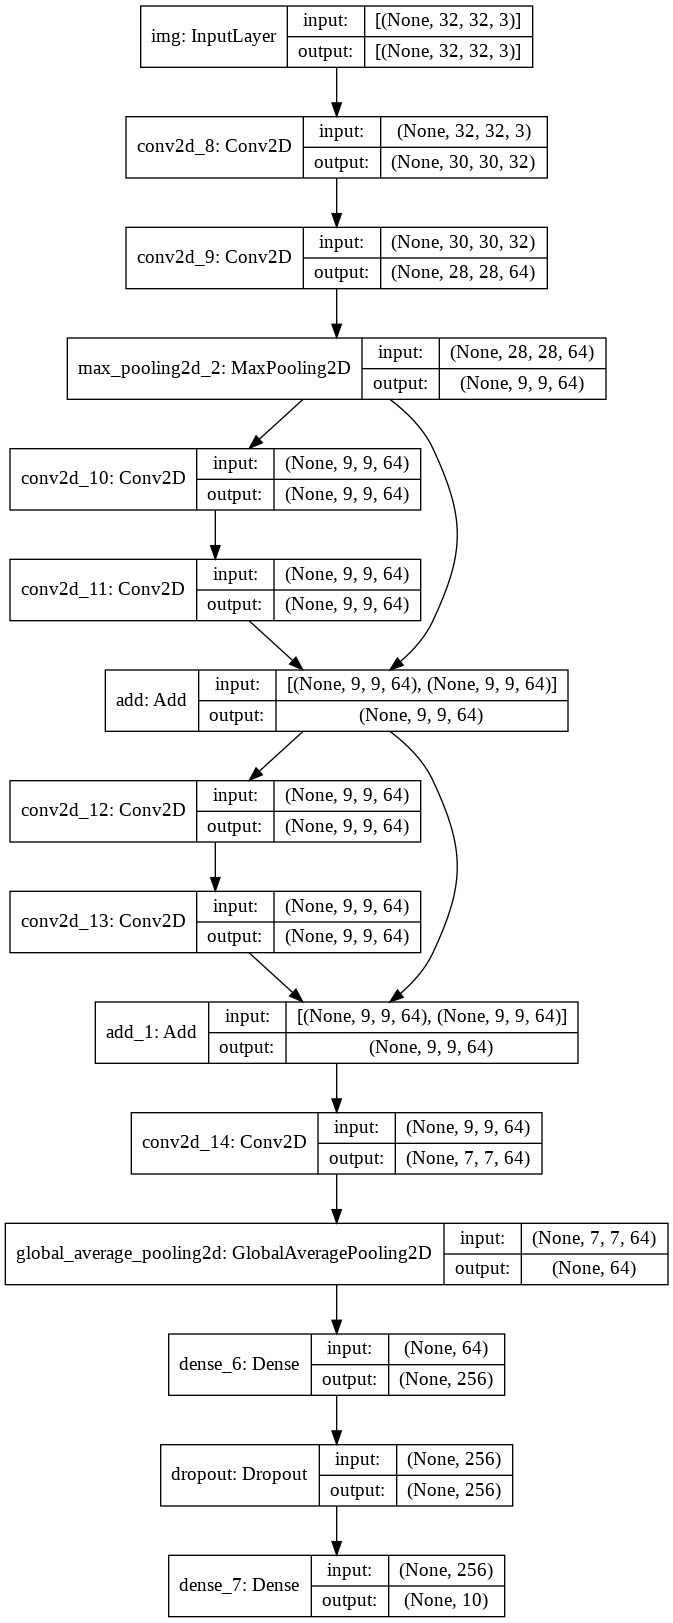

In [53]:
keras.utils.plot_model(model, "mini_resnet.png", show_shapes=True)
#output이 다음으로 넘어온다.

In [56]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model.compile(
    optimizer=keras.optimizers.RMSprop(1e-3),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=["acc"],
)
!
model.fit(x_train[:1000], y_train[:1000], batch_size=64, epochs=1, validation_split=0.2)

# 텐서플로우에서는 softmax 함수를 거치지 않고, from_logits = True를 사용하는게 numerical stable하다고 설명하

13/13 [==============================] - 2s 48ms/step - loss: 2.3894 - acc: 0.1225 - val_loss: 2.2713 - val_acc: 0.1600


Shared layers

In [57]:
#128차원의 1000단어 매핑하는 레이어
shared_embedding = layers.Embedding(1000, 128)
#1번째 input
text_input_a = keras.Input(shape=(None,), dtype="int32")
#2번째 input
text_input_b = keras.Input(shape=(None,), dtype="int32")

#각각 input에 대해서 layer를 두번 호출
encoded_input_a = shared_embedding(text_input_a)
encoded_input_b = shared_embedding(text_input_b)

Extract and reuse nodes in the graph of layers(추출)

In [58]:
vgg19 = tf.keras.applications.VGG19()
#vgg19 layer에서 layer들의 output을 feature_list에 저장

574726144/574710816 [==============================] - 6s 0us/step


In [60]:
features_list = [layer.output for layer in vgg19.layers]
features_list

[<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_11')>,
 <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv1')>,
 <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv2')>,
 <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'block1_pool')>,
 <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv1')>,
 <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv2')>,
 <KerasTensor: shape=(None, 56, 56, 128) dtype=float32 (created by layer 'block2_pool')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv1')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv2')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv3')>,
 <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv4')>

In [66]:
feat_extraction_model = keras.Model(inputs=vgg19.input, outputs=features_list)
img=np.random.random((1,224,224,3)).astype("float32")
extracted_features = feat_extraction_model(img)

extracted_features[0] 
# 생성한 모델에 img를 넣어주기
# 어떤지  보기

<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.4078076 , 0.10898189, 0.87937325],
         [0.96939677, 0.33287227, 0.92747176],
         [0.66920185, 0.61615497, 0.43683618],
         ...,
         [0.7807983 , 0.6353126 , 0.06514651],
         [0.8102169 , 0.4727292 , 0.02946447],
         [0.51494956, 0.30669504, 0.7677436 ]],

        [[0.8087183 , 0.78721833, 0.50880235],
         [0.35227615, 0.05635314, 0.0783497 ],
         [0.05132271, 0.5789873 , 0.01175316],
         ...,
         [0.00100666, 0.88666356, 0.5337742 ],
         [0.52536786, 0.07207043, 0.26808372],
         [0.48051926, 0.15728244, 0.37743655]],

        [[0.5685919 , 0.24821131, 0.7449654 ],
         [0.86638457, 0.4973586 , 0.31565028],
         [0.38098112, 0.59008425, 0.288048  ],
         ...,
         [0.2732563 , 0.66802967, 0.9493058 ],
         [0.4806563 , 0.62082565, 0.46514502],
         [0.5564707 , 0.9270539 , 0.42542306]],

        ...,

        [[0.5464672 , 0.80810195, 

Extend the API using custom layers:
customizing layer 하기


In [67]:
class CustomDense(layers.Layer):
    def __init__(self, units=32):
        super(CustomDense, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,), initializer="random_normal", trainable=True
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b


inputs = keras.Input((4,))
outputs = CustomDense(10)(inputs)

model = keras.Model(inputs, outputs)

In [68]:
class CustomDense(layers.Layer):
    def __init__(self, units=32):
        super(CustomDense, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.w = self.add_weight(
            shape=(input_shape[-1], self.units),
            initializer="random_normal",
            trainable=True,
        )
        self.b = self.add_weight(
            shape=(self.units,), initializer="random_normal", trainable=True
        )

    def call(self, inputs):
        return tf.matmul(inputs, self.w) + self.b

    def get_config(self):   #추가
        return {"units": self.units}


inputs = keras.Input((4,))
outputs = CustomDense(10)(inputs)

model = keras.Model(inputs, outputs)
config = model.get_config()

new_model = keras.Model.from_config(config, custom_objects={"CustomDense": CustomDense})

In [69]:
def from_config(cls, config):
  return cls(**config)


1 간결하다
2) 그래프를 구성하면서 모델 검증이 이루어진다
3) 그래프로 그릴 수 있고, 조사할 수 있다.(inspectable)

- 간결하다(subclassing)

In [70]:
inputs = keras.Input(shape=(32,))
x = layers.Dense(64, activation='relu')(inputs)
outputs = layers.Dense(10)(x)
mlp = keras.Model(inputs, outputs)

In [71]:
class MLP(keras.Model):

  def __init__(self, **kwargs):
    super(MLP, self).__init__(**kwargs)
    self.dense_1 = layers.Dense(64, activation='relu')
    self.dense_2 = layers.Dense(10)

  def call(self, inputs):
    x = self.dense_1(inputs)
    return self.dense_2(x)

#클래스이니 인스턴스 생성하기.
mlp = MLP()
# 모델을 부르기 위해서 미리 불러주기
_ = mlp(tf.zeros((1, 32)))

- 미리 검증이 가능하다

단점: tree RNN, recursive network에서 사용할 수 없다

In [72]:
features_list = [layer.output for layer in vgg19.layers]
feat_extraction_model = keras.Model(inputs=vgg19.input, outputs=features_list)

In [73]:
units = 32
timesteps = 10
input_dim = 5

# 모델 생성
inputs = keras.Input((None, units))
x = layers.GlobalAveragePooling1D()(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs, outputs)

#RNN layer 만들기
class CustomRNN(layers.Layer):
    def __init__(self):  #init 으로 layer을 정리
        super(CustomRNN, self).__init__()
        self.units = units
        self.projection_1 = layers.Dense(units=units, activation="tanh")
        self.projection_2 = layers.Dense(units=units, activation="tanh")
        # projection(투사):NLP에서 사용
        self.classifier = model

    def call(self, inputs): #어떻게 실행할 지 정의하기
        outputs = []
        state = tf.zeros(shape=(inputs.shape[0], self.units)) #0으로 이뤄진 tensor
        for t in range(inputs.shape[1]):
            x = inputs[:, t, :]
            h = self.projection_1(x)
            y = h + self.projection_2(state)
            state = y
            outputs.append(y)
        features = tf.stack(outputs, axis=1)
        print(features.shape)
        return self.classifier(features)


rnn_model = CustomRNN()
_ = rnn_model(tf.zeros((1, timesteps, input_dim)))

(1, 10, 32)


In [74]:
units = 32
timesteps = 10
input_dim = 5
batch_size = 16


class CustomRNN(layers.Layer):
    def __init__(self):
        super(CustomRNN, self).__init__()
        self.units = units
        self.projection_1 = layers.Dense(units=units, activation="tanh")
        self.projection_2 = layers.Dense(units=units, activation="tanh")
        self.classifier = layers.Dense(1)

    def call(self, inputs):
        outputs = []
        state = tf.zeros(shape=(inputs.shape[0], self.units))
        for t in range(inputs.shape[1]):
            x = inputs[:, t, :]
            h = self.projection_1(x)
            y = h + self.projection_2(state)
            state = y
            outputs.append(y)
        features = tf.stack(outputs, axis=1)
        return self.classifier(features)


# Note that you specify a static batch size for the inputs with the `batch_shape`
# arg, because the inner computation of `CustomRNN` requires a static batch size
# (when you create the `state` zeros tensor).
inputs = keras.Input(batch_shape=(batch_size, timesteps, input_dim))
x = layers.Conv1D(32, 3)(inputs)
outputs = CustomRNN()(x)

model = keras.Model(inputs, outputs)

rnn_model = CustomRNN()
_ = rnn_model(tf.zeros((1, 10, 5)))